<a href="https://colab.research.google.com/github/sangeeth-sadanand/data-science-learning/blob/main/packages/matplotlib/Plot_Types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plot

## 📊 **Common Matplotlib Plots: Functions & Key Parameters**

| **Plot Type**       | **Function**            | **Key Parameters**                                                                                  |
|---------------------|-------------------------|-----------------------------------------------------------------------------------------------------|
| **Line Plot**       | `plt.plot()`            | `x`, `y`, `color`, `linestyle`, `linewidth`, `marker`, `label`                                      |
| **Scatter Plot**    | `plt.scatter()`         | `x`, `y`, `color`, `marker`, `s` (size), `alpha`, `cmap`                                            |
| **Bar Chart**       | `plt.bar()`             | `x`, `height`, `width`, `color`, `align`, `edgecolor`, `label`                                      |
| **Horizontal Bar**  | `plt.barh()`            | `y`, `width`, same as above                                                                         |
| **Histogram**       | `plt.hist()`            | `x`, `bins`, `density`, `color`, `alpha`, `histtype`, `rwidth`                                      |
| **Pie Chart**       | `plt.pie()`             | `x`, `labels`, `autopct`, `colors`, `explode`, `shadow`, `startangle`                               |
| **Box Plot**        | `plt.boxplot()`         | `x`, `notch`, `vert`, `patch_artist`, `boxprops`, `labels`                                          |
| **Error Bars**      | `plt.errorbar()`        | `x`, `y`, `xerr`, `yerr`, `fmt`, `ecolor`, `capsize`, `linestyle`, `linewidth`                      |
| **Stack Plot**      | `plt.stackplot()`       | `x`, `y1, y2,…`, `labels`, `colors`, `alpha`                                                        |
| **Area Plot**       | `plt.fill_between()`    | `x`, `y1`, `y2` (optional), `color`, `alpha`, `where`, `interpolate`                                |
| **Step Plot**       | `plt.step()`            | `x`, `y`, `where`, `linestyle`, `color`                                                             |
| **Polar Plot**      | `ax.plot()` (polar)     | `theta`, `r`, within `projection='polar'` axes; supports same styling as line plot                  |
| **3D Line/Scatter** | `ax.plot3D()`, `ax.scatter3D()` | `x`, `y`, `z`, `color`, `marker`, `label`, within 3D `Axes3D`                               |
| **Heatmap / Image** | `plt.imshow()`          | `X`, `cmap`, `aspect`, `interpolation`, `origin`, `extent`, `vmin`, `vmax`                          |
| **Contour Plot**    | `plt.contour()`         | `X`, `Y`, `Z`, `levels`, `colors`, `linestyles`, `cmap`                                             |
| **Filled Contour**  | `plt.contourf()`        | Same as above, but fills space between contours                                                     |
| **Quiver Plot**     | `plt.quiver()`          | `X`, `Y`, `U`, `V`, `color`, `scale`, `angles`, `pivot`, `cmap`                                     |
| **Streamplot**      | `plt.streamplot()`      | `X`, `Y`, `U`, `V`, `density`, `color`, `linewidth`, `arrowsize`                                    |


## 🧠 Bonus Tools for Enhanced Control

| **Task**                   | **Function(s)**                         |
|---------------------------|------------------------------------------|
| Customize Axes/Title      | `ax.set_title()`, `ax.set_xlabel()` etc. |
| Add Text                  | `plt.text()`, `ax.annotate()`            |
| Customize Ticks           | `plt.xticks()`, `plt.yticks()`           |
| Add Grid                  | `plt.grid(True)`                         |
| Add Legend                | `plt.legend()`                           |
| Save Plot                 | `plt.savefig("plot.png", dpi=300)`       |


## Line Plot

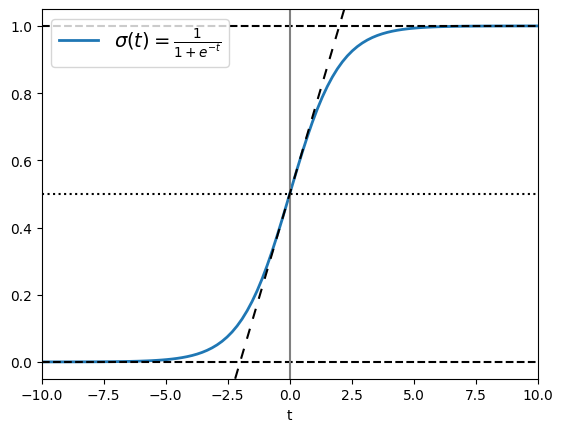

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

fig, ax = plt.subplots()
ax.plot(t, sig, linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")

# Add horizonatal lines
ax.axhline(y=0, color="black", linestyle="--")
ax.axhline(y=0.5, color="black", linestyle=":")
ax.axhline(y=1.0, color="black", linestyle="--")

# Vertical line at 0
ax.axvline(color="grey")

# adding a slanting line indicating slope
ax.axline((0, 0.5), slope=0.25, color="black", linestyle=(0, (5, 5)))

# Set xlimit
ax.set(xlim=(-10, 10), xlabel="t")
ax.legend(fontsize=14)

plt.show()

## Scatter plot

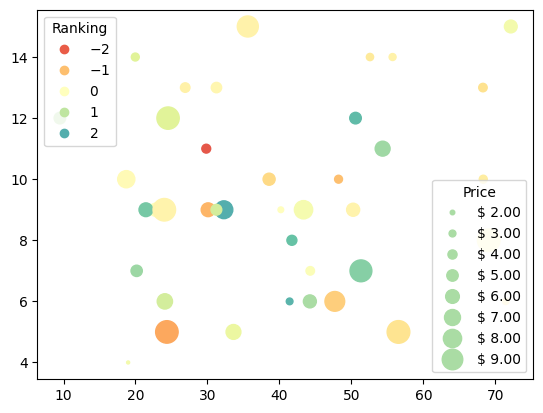

In [ ]:
volume = np.random.rayleigh(27, size=40)
amount = np.random.poisson(10, size=40)
ranking = np.random.normal(size=40)
price = np.random.uniform(1, 10, size=40)

fig, ax = plt.subplots()
scatter = ax.scatter(volume, amount, c=ranking, s=0.3*(price*3)**2,
                     vmin=-3, vmax=3, cmap="Spectral")

legend1 = ax.legend(*scatter.legend_elements(num=5),
                    loc="upper left", title="Ranking")
ax.add_artist(legend1)

kw = dict(prop="sizes", num=6, color=scatter.cmap(0.7), fmt="$ {x:.2f}",
          func=lambda s: np.sqrt(s/.3)/3)
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Price")
plt.show()

## Bar chart

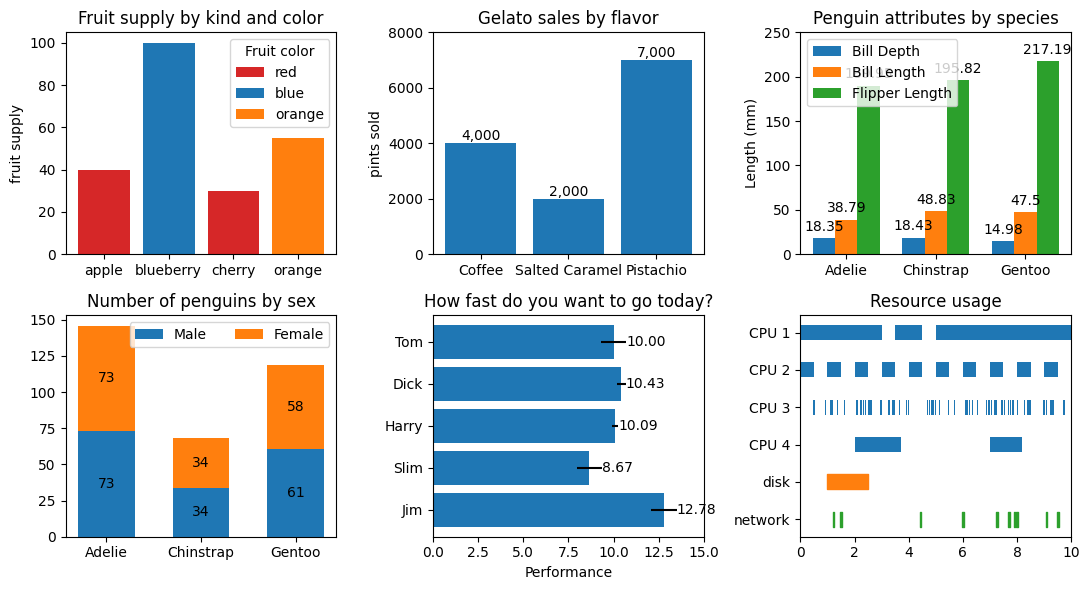

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2,3, figsize=(11, 6))

## Plot 1
fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax[0,0].bar(fruits, counts, label=bar_labels, color=bar_colors)

ax[0,0].set_ylabel('fruit supply')
ax[0,0].set_title('Fruit supply by kind and color')
ax[0,0].legend(title='Fruit color')

## plot 2

species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Male': np.array([73, 34, 61]),
    'Female': np.array([73, 34, 58]),
}
width = 0.6

bottom = np.zeros(3)

for sex, sex_count in sex_counts.items():
    p = ax[1,0].bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax[1,0].bar_label(p, label_type='center')

ax[1,0].set_title('Number of penguins by sex')
ax[1,0].legend(ncols=3)

## Plot 3

fruit_names = ['Coffee', 'Salted Caramel', 'Pistachio']
fruit_counts = [4000, 2000, 7000]

bar_container = ax[0,1].bar(fruit_names, fruit_counts)
ax[0,1].set(ylabel='pints sold', title='Gelato sales by flavor', ylim=(0, 8000))
ax[0,1].bar_label(bar_container, fmt='{:,.0f}')

## Plot 4
np.random.seed(19680801)
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

hbars = ax[1,1].barh(y_pos, performance, xerr=error, align='center')
ax[1,1].set_yticks(y_pos, labels=people)
ax[1,1].invert_yaxis()  # labels read top-to-bottom
ax[1,1].set_xlabel('Performance')
ax[1,1].set_title('How fast do you want to go today?')

# Label with specially formatted floats
ax[1,1].bar_label(hbars, fmt='%.2f')
ax[1,1].set_xlim(right=15)  # adjust xlim to fit labels

## Plot 5

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax[0,2].bar(x + offset, measurement, width, label=attribute)
    ax[0,2].bar_label(rects, padding=3)
    multiplier += 1

ax[0,2].set_ylabel('Length (mm)')
ax[0,2].set_title('Penguin attributes by species')
ax[0,2].set_xticks(x + width, species)
ax[0,2].legend(loc='upper left')
ax[0,2].set_ylim(0, 250)


## Plot 6

cpu_1 = [(0, 3), (3.5, 1), (5, 5)]
cpu_2 = np.column_stack([np.linspace(0, 9, 10), np.full(10, 0.5)])
cpu_3 = np.column_stack([10*np.random.random(61), np.full(61, 0.05)])
cpu_4 = [(2, 1.7), (7, 1.2)]
disk = [(1, 1.5)]
network = np.column_stack([10*np.random.random(10), np.full(10, 0.05)])


ax[1,2].broken_barh(cpu_1, (-0.2, 0.4))
ax[1,2].broken_barh(cpu_2, (0.8, 0.4))
ax[1,2].broken_barh(cpu_3, (1.8, 0.4))
ax[1,2].broken_barh(cpu_4, (2.8, 0.4))
ax[1,2].broken_barh(disk, (3.8, 0.4), color="tab:orange")
ax[1,2].broken_barh(network, (4.8, 0.4), color="tab:green")
ax[1,2].set_xlim(0, 10)
ax[1,2].set_yticks(range(6),
              labels=["CPU 1", "CPU 2", "CPU 3", "CPU 4", "disk", "network"])
ax[1,2].invert_yaxis()
ax[1,2].set_title("Resource usage")


plt.tight_layout()
plt.show()

## Histogram

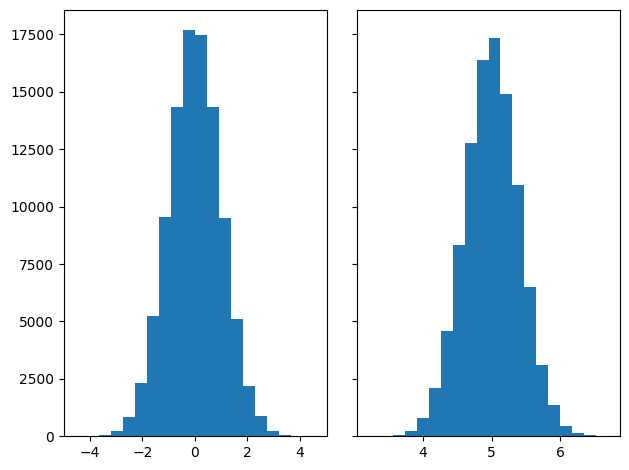

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(19680801)
N_points = 100000
n_bins = 20

# Generate two normal distributions
dist1 = rng.standard_normal(N_points)
dist2 = 0.4 * rng.standard_normal(N_points) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)

plt.show()

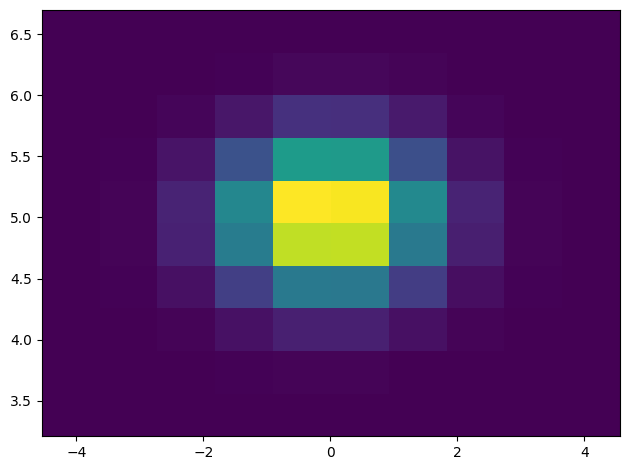

In [ ]:
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(dist1, dist2)

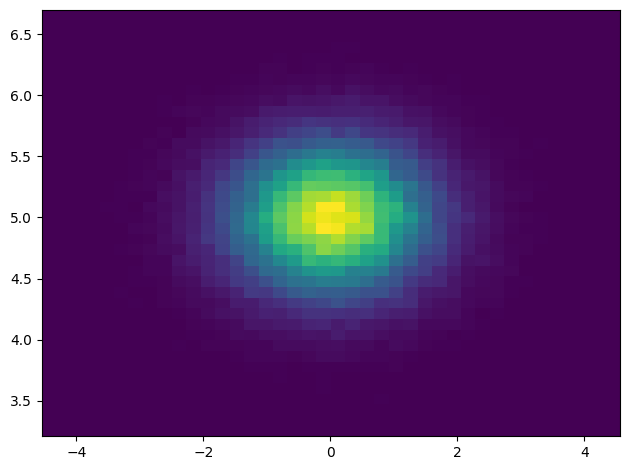

In [ ]:
fig, ax = plt.subplots(tight_layout=True)
s = ax.hist2d(dist1, dist2, bins=40)

## Pie Chart

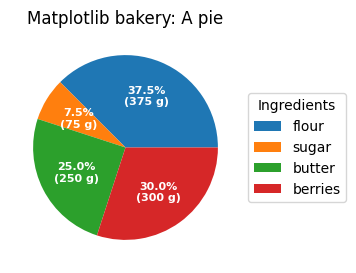

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} g)"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

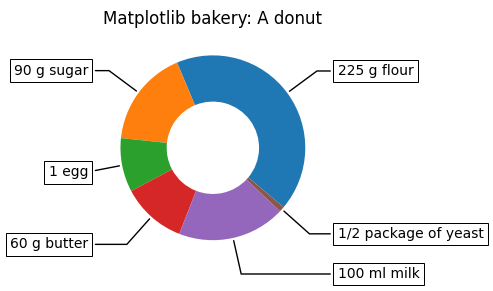

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["225 g flour",
          "90 g sugar",
          "1 egg",
          "60 g butter",
          "100 ml milk",
          "1/2 package of yeast"]

data = [225, 90, 50, 60, 100, 5]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()

## Box Plot

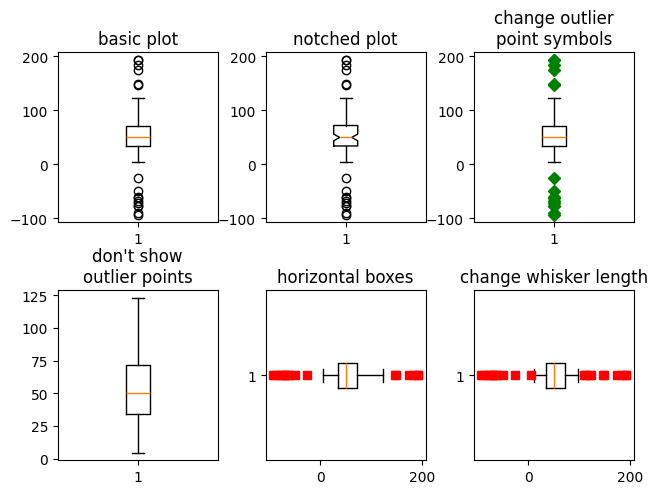

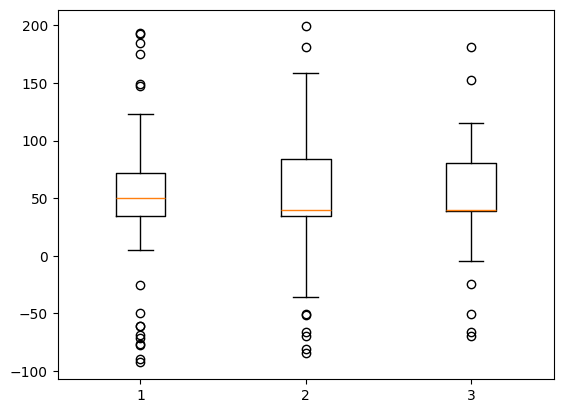

In [9]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Polygon

# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

fig, axs = plt.subplots(2, 3)

# basic plot
axs[0, 0].boxplot(data)
axs[0, 0].set_title('basic plot')

# notched plot
axs[0, 1].boxplot(data, notch=True)
axs[0, 1].set_title('notched plot')

# change outlier point symbols
axs[0, 2].boxplot(data, sym='gD')
axs[0, 2].set_title('change outlier\npoint symbols')

# don't show outlier points
axs[1, 0].boxplot(data, sym='')
axs[1, 0].set_title("don't show\noutlier points")

# horizontal boxes
axs[1, 1].boxplot(data, sym='rs', orientation='horizontal')
axs[1, 1].set_title('horizontal boxes')

# change whisker length
axs[1, 2].boxplot(data, sym='rs', orientation='horizontal', whis=0.75)
axs[1, 2].set_title('change whisker length')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

# fake up some more data
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2]]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)

plt.show()

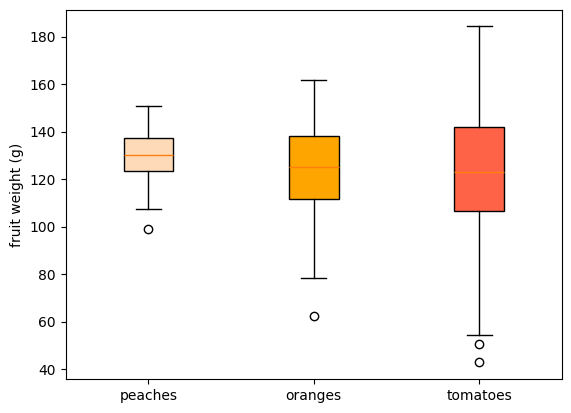

In [10]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
fruit_weights = [
    np.random.normal(130, 10, size=100),
    np.random.normal(125, 20, size=100),
    np.random.normal(120, 30, size=100),
]
labels = ['peaches', 'oranges', 'tomatoes']
colors = ['peachpuff', 'orange', 'tomato']

fig, ax = plt.subplots()
ax.set_ylabel('fruit weight (g)')

bplot = ax.boxplot(fruit_weights,
                   patch_artist=True,  # fill with color
                   tick_labels=labels)  # will be used to label x-ticks

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

## Error Plot

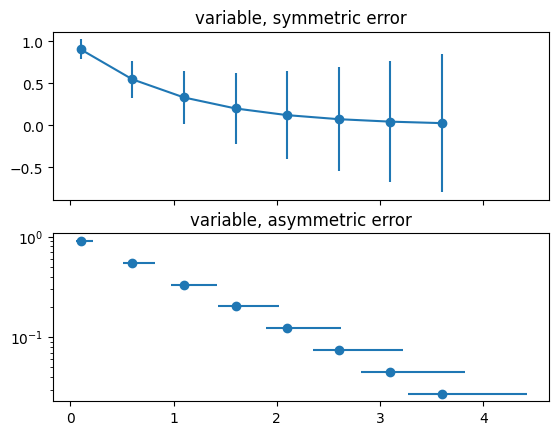

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example error bar values that vary with x-position
error = 0.1 + 0.2 * x

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.errorbar(x, y, yerr=error, fmt='-o')
ax0.set_title('variable, symmetric error')

# error bar values w/ different -/+ errors that
# also vary with the x-position
lower_error = 0.4 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]

ax1.errorbar(x, y, xerr=asymmetric_error, fmt='o')
ax1.set_title('variable, asymmetric error')
ax1.set_yscale('log')
plt.show()

## Stack Plot


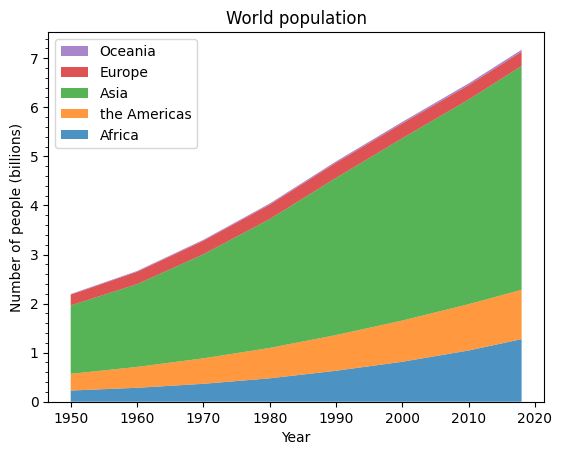

In [13]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as mticker

# data from United Nations World Population Prospects (Revision 2019)
# https://population.un.org/wpp/, license: CC BY 3.0 IGO
year = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018]
population_by_continent = {
    'Africa': [.228, .284, .365, .477, .631, .814, 1.044, 1.275],
    'the Americas': [.340, .425, .519, .619, .727, .840, .943, 1.006],
    'Asia': [1.394, 1.686, 2.120, 2.625, 3.202, 3.714, 4.169, 4.560],
    'Europe': [.220, .253, .276, .295, .310, .303, .294, .293],
    'Oceania': [.012, .015, .019, .022, .026, .031, .036, .039],
}

fig, ax = plt.subplots()
ax.stackplot(year, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=0.8)
ax.legend(loc='upper left', reverse=True)
ax.set_title('World population')
ax.set_xlabel('Year')
ax.set_ylabel('Number of people (billions)')
# add tick at every 200 million people
ax.yaxis.set_minor_locator(mticker.MultipleLocator(.2))

plt.show()

## Area Plot


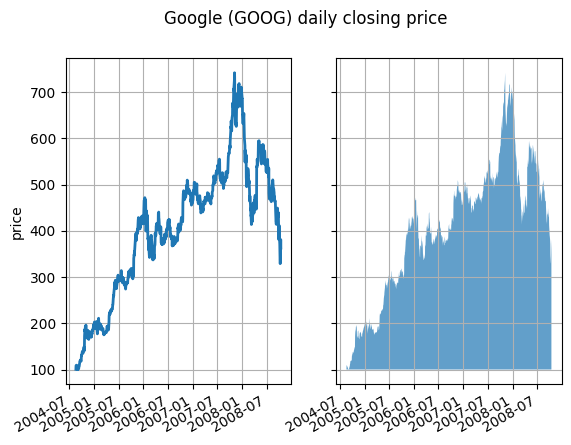

In [16]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cbook as cbook

# load up some sample financial data
r = cbook.get_sample_data('goog.npz')['price_data']
# create two subplots with the shared x and y axes
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

pricemin = r["close"].min()

ax1.plot(r["date"], r["close"], lw=2)
ax2.fill_between(r["date"], pricemin, r["close"], alpha=0.7)

for ax in ax1, ax2:
    ax.grid(True)
    ax.label_outer()

ax1.set_ylabel('price')

fig.suptitle('Google (GOOG) daily closing price')
fig.autofmt_xdate()

## Step Plot


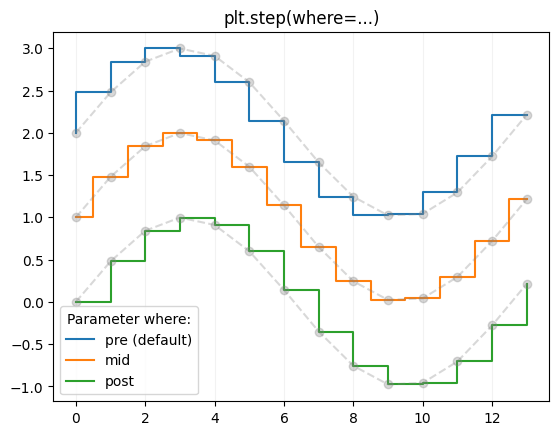

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(14)
y = np.sin(x / 2)

plt.step(x, y + 2, label='pre (default)')
plt.plot(x, y + 2, 'o--', color='grey', alpha=0.3)

plt.step(x, y + 1, where='mid', label='mid')
plt.plot(x, y + 1, 'o--', color='grey', alpha=0.3)

plt.step(x, y, where='post', label='post')
plt.plot(x, y, 'o--', color='grey', alpha=0.3)

plt.grid(axis='x', color='0.95')
plt.legend(title='Parameter where:')
plt.title('plt.step(where=...)')
plt.show()

## Polar Plot


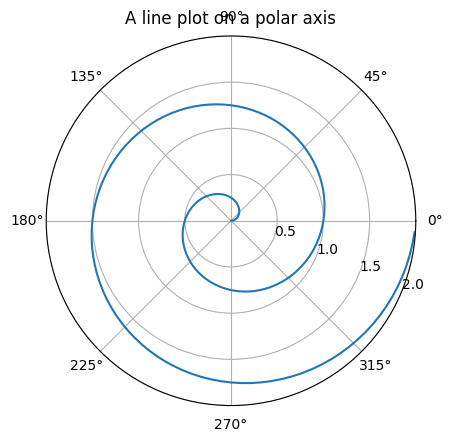

In [18]:
import matplotlib.pyplot as plt
import numpy as np

r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

## 3D Line/Scatter


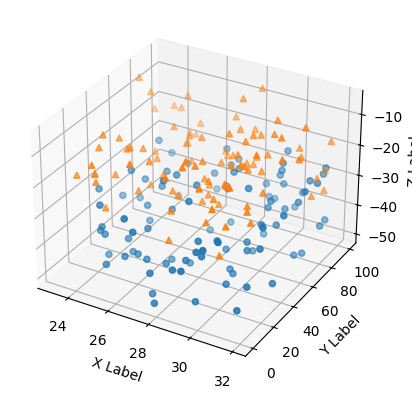

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

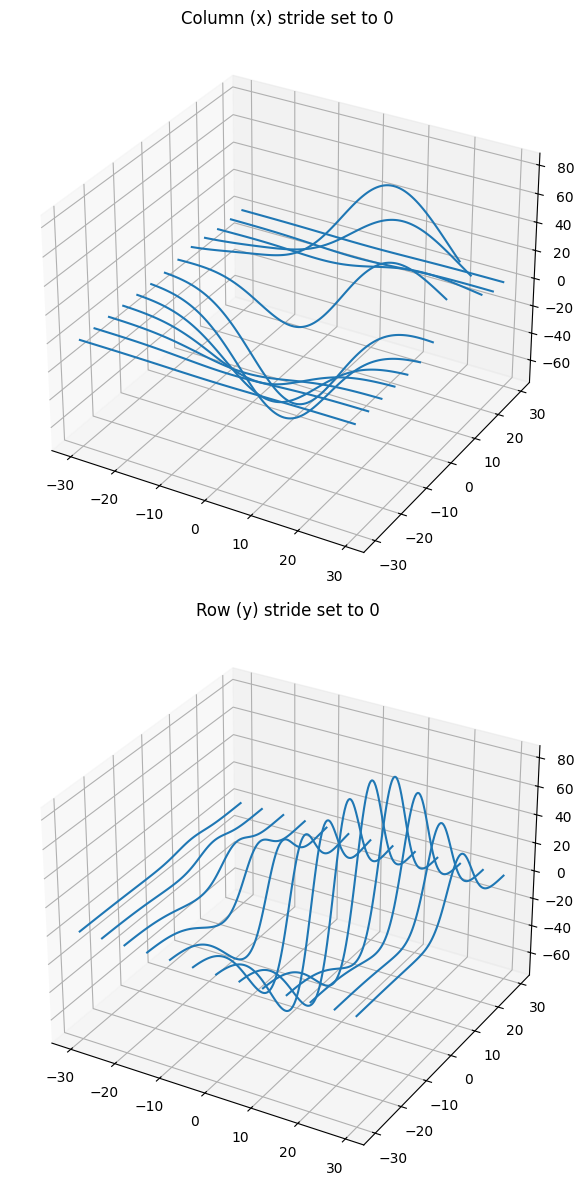

In [20]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(8, 12), subplot_kw={'projection': '3d'})

# Get the test data
X, Y, Z = axes3d.get_test_data(0.05)

# Give the first plot only wireframes of the type y = c
ax1.plot_wireframe(X, Y, Z, rstride=10, cstride=0)
ax1.set_title("Column (x) stride set to 0")

# Give the second plot only wireframes of the type x = c
ax2.plot_wireframe(X, Y, Z, rstride=0, cstride=10)
ax2.set_title("Row (y) stride set to 0")

plt.tight_layout()
plt.show()

## Heatmap / Image


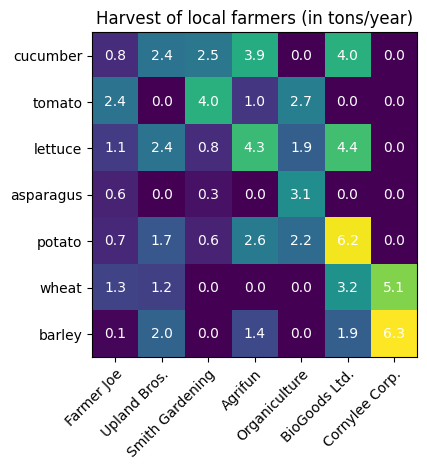

In [21]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl


vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(farmers)), labels=farmers,
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(vegetables)), labels=vegetables)

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

## Contour Plot


Text(0.5, 1.0, 'Simplest default with labels')

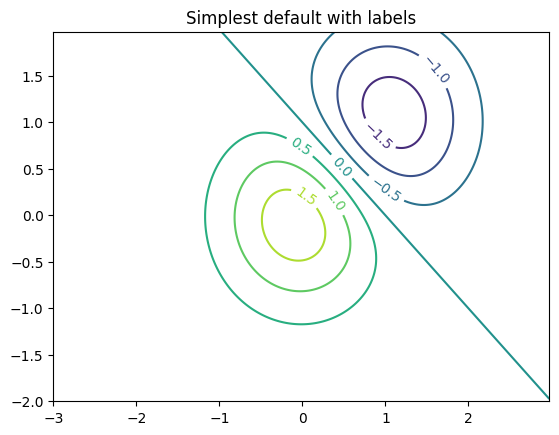

In [23]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cm as cm

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2



fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, fontsize=10)
ax.set_title('Simplest default with labels')

## Quiver Plot


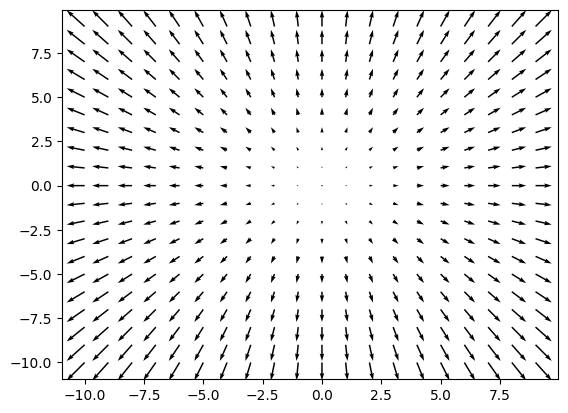

In [1]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()

## Streamplot

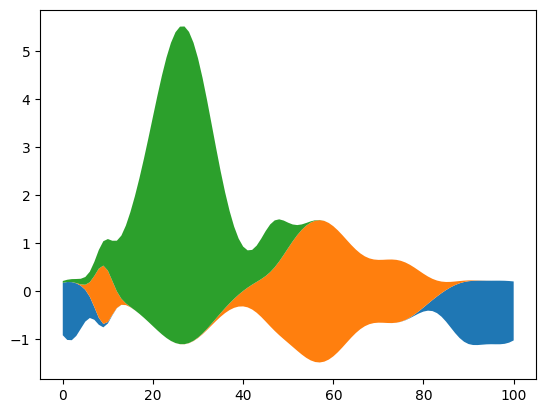

In [14]:
# Fixing random state for reproducibility
np.random.seed(19680801)


def gaussian_mixture(x, n=5):
    """Return a random mixture of *n* Gaussians, evaluated at positions *x*."""
    def add_random_gaussian(a):
        amplitude = 1 / (.1 + np.random.random())
        dx = x[-1] - x[0]
        x0 = (2 * np.random.random() - .5) * dx
        z = 10 / (.1 + np.random.random()) / dx
        a += amplitude * np.exp(-(z * (x - x0))**2)
    a = np.zeros_like(x)
    for j in range(n):
        add_random_gaussian(a)
    return a


x = np.linspace(0, 100, 101)
ys = [gaussian_mixture(x) for _ in range(3)]

fig, ax = plt.subplots()
ax.stackplot(x, ys, baseline='wiggle')
plt.show()